In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()
# print(boston.DESCR)
boston_df = boston.data

In [3]:
boston_df

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [4]:
df = pd.DataFrame(boston_df, columns=boston.feature_names)

In [5]:
df['target'] = boston.target

In [6]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [15]:
# CRIM - per capita crime rate by town
# ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
# INDUS - proportion of non-retail business acres per town.
# CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
# NOX - nitric oxides concentration (parts per 10 million)
# RM - average number of rooms per dwelling
# AGE - proportion of owner-occupied units built prior to 1940
# DIS - weighted distances to five Boston employment centres
# RAD - index of accessibility to radial highways
# TAX - full-value property-tax rate per $10,000
# PTRATIO - pupil-teacher ratio by town
# B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
# LSTAT - % lower status of the population
# MEDV - Median value of owner-occupied homes in $1000's

In [7]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


C:\Users\sumanth\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='target', ylabel='Density'>

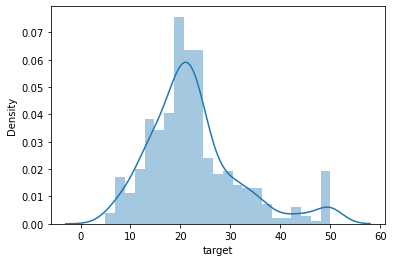

In [18]:
sns.distplot(df['target'])

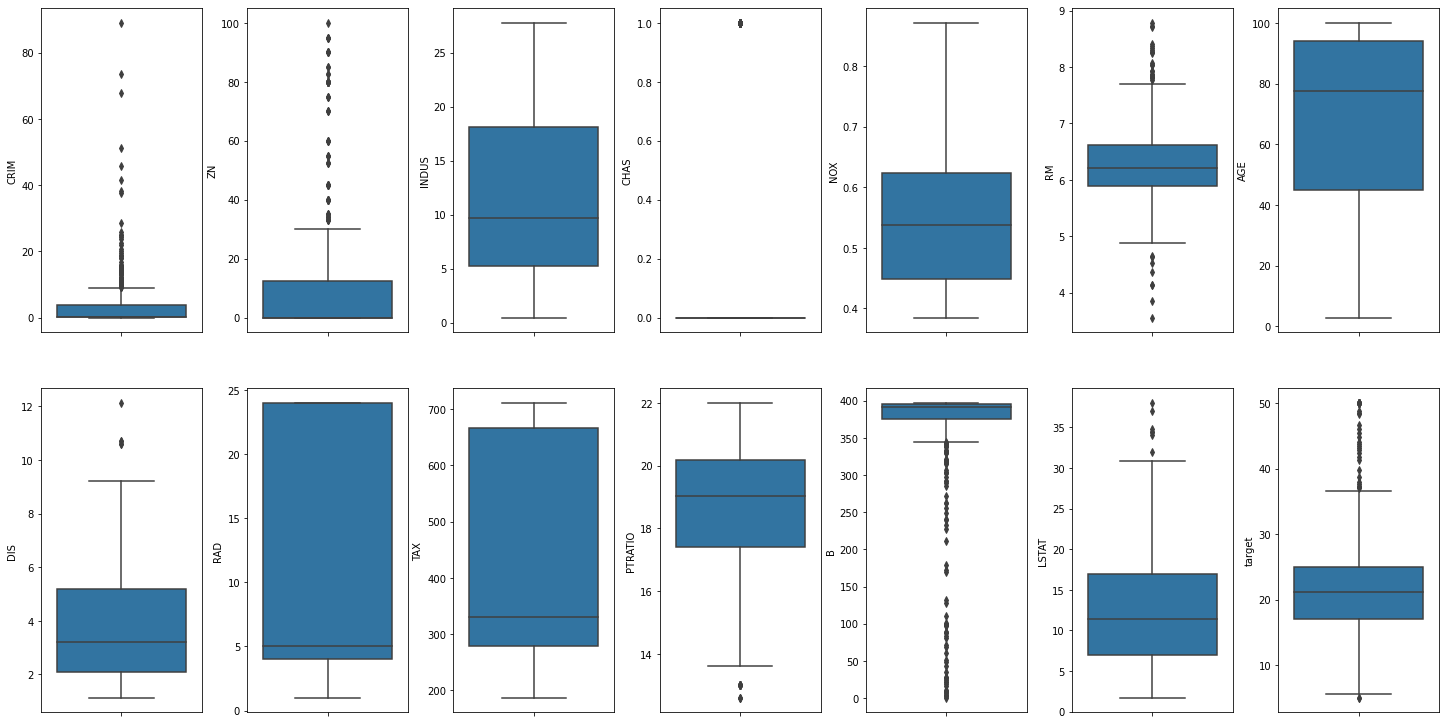

In [45]:
from scipy import stats

fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in df.items():
    sns.boxplot(y=k, data=df, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [47]:
df = df[~(df['target'] >= 50.0)]
df.shape

(490, 14)

<AxesSubplot:>

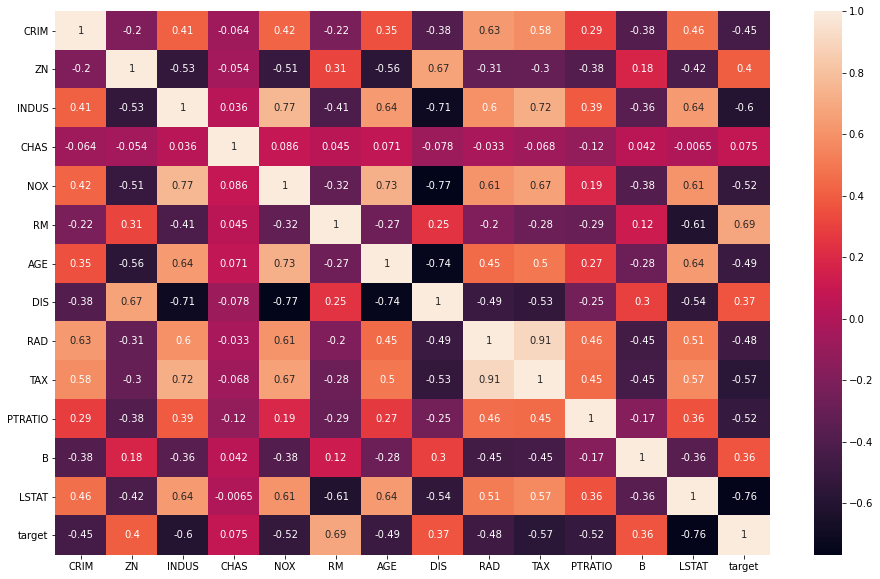

In [48]:
fig, ax = plt.subplots(figsize=(16,10))         # Sample figsize in inches

sns.heatmap(df.corr(), annot=True, ax=ax)
# sns.fig

In [49]:
x = df.iloc[:, df.columns!='target']

y = df.iloc[:, df.columns=='target']

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [51]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)

In [52]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [53]:
y_pred = lr.predict(x_test)

In [54]:
lr.coef_

array([[-1.17990309e-01,  2.82279280e-02, -3.28124596e-02,
         3.31660809e-01, -1.27399580e+01,  4.05380112e+00,
        -3.31245872e-02, -1.12598266e+00,  2.33406067e-01,
        -1.28647645e-02, -8.55880009e-01,  8.57471292e-03,
        -2.86322263e-01]])

In [55]:
lr.intercept_

array([29.87425472])

In [70]:
coeff_df = pd.DataFrame(lr.coef_.reshape(13,1), x.columns,columns=['Coefficient'])
coeff_df

,Coefficient
CRIM,-0.117990
ZN,0.028228
INDUS,-0.032812
CHAS,0.331661
NOX,-12.739958
RM,4.053801
AGE,-0.033125
DIS,-1.125983
RAD,0.233406
TAX,-0.012865


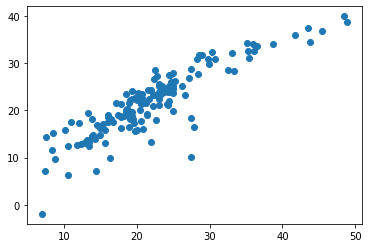

In [56]:
plt.scatter(y_test,y_pred)

In [58]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 2.709358996974172
MSE: 14.471049622747213
RMSE: 3.804083282835329
